<a href="https://colab.research.google.com/github/Aloxxa/r_public/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Библиотеки

In [ ]:
!pip install faker

In [ ]:
from faker import Faker
# Base
# -----------------------------------
import random
import numpy as np
import datetime
import pandas as pd
# Visualization
# -----------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from wordcloud import WordCloud
# SQL
# -----------------------------------
import sqlite3

plt.style.use('dark_background')
fake = Faker()

# Заливка

(1)	Таблица сотрудников EMPLOYEE
id_emp	name_emp	id_region	job_id	hire_date


id_emp	- идентификатор сотрудника

name_emp – наименование сотрудника (ФИО)

id_region – идентификатор места жительства сотрудника

job_id – идентификатор места работы сотрудника

hire_date – дата принятия (выхода) на работу сотрудника (в формате ДД.ММ.ГГГГ)




In [ ]:
EMPLOYEE_data = pd.DataFrame({'id_emp': range(1,151)})
#будет 150 сотрудников, чтобы сохранялась коммуникация между всеми (так пишут в умных книжках)

In [ ]:
np.random.seed(42)
names = pd.Series([fake.name() for i in range(len(EMPLOYEE_data))]).values
len(set(names))
#хорошо, что в умных книжках пишут про 150, а то на 1000 сущностей уже не удается получить 1000 уникальных имен

149

In [ ]:
EMPLOYEE_data['name_emp'] = names

In [ ]:
EMPLOYEE_data['id_region'] = pd.Series(range(1,16)).sample(len(EMPLOYEE_data), replace=True, random_state=42).values
#15 см в REGION_data (там создано именно 15 регионов)

In [ ]:
EMPLOYEE_data['job_id'] = pd.Series(range(1,31)).sample(len(EMPLOYEE_data), replace=True, random_state=42).values
#судя по таблице 3, они не должны быть уникальными, да и 150 должностей нереалистично (Папич не одобряет)
# 30 см в WORK_data (там создано именно 30 должностей)

In [ ]:
np.random.seed(42)
EMPLOYEE_data['hire_date'] = pd.Series([fake.date_between(start_date='-5y', end_date='today') for _ in range(len(EMPLOYEE_data))]).values
EMPLOYEE_data['hire_date'] = pd.to_datetime(EMPLOYEE_data['hire_date'], format='%d.%m.%Y')
# формат даты ДД.ММ.ГГГГ

In [ ]:
employee_df = EMPLOYEE_data.copy()
#важно предохраняться

In [ ]:
employee_df

,id_emp,name_emp,id_region,job_id,hire_date
0,1,Jack Moody,7,7,2021-05-23
1,2,Joseph Oconnell,4,20,2020-02-08
2,3,Angela Rosales,13,29,2023-09-21
3,4,Julia Stevens,15,15,2019-10-26
4,5,Lindsey Elliott,11,11,2020-04-27
...,...,...,...,...,...
145,146,William Snyder,3,1,2020-08-24
146,147,David Bennett,1,27,2019-04-30
147,148,Jeffrey Walker,11,5,2022-08-27
148,149,Ana Garza,5,10,2023-04-22


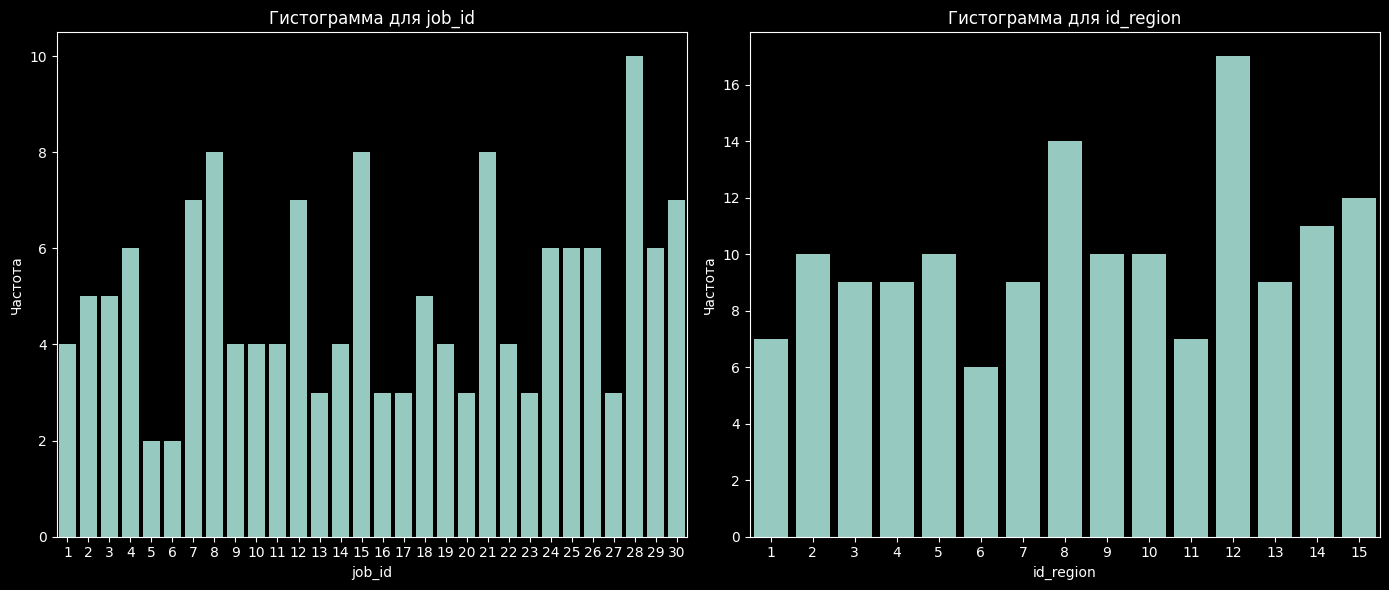

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.countplot(x='job_id', data=employee_df, ax=axes[0])
axes[0].set_title('Гистограмма для job_id')
axes[0].set_xlabel('job_id')
axes[0].set_ylabel('Частота')

sns.countplot(x='id_region', data=employee_df, ax=axes[1])
axes[1].set_title('Гистограмма для id_region')
axes[1].set_xlabel('id_region')
axes[1].set_ylabel('Частота')

plt.tight_layout()
#темная тема import plotly.io as pio plotly_template = pio.templates["plotly_dark"]

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio

pio.templates.default = "plotly_dark"

fig = make_subplots(rows=1, cols=2, subplot_titles=('Гистограмма для job_id', 'Гистограмма для id_region'))

fig.add_trace(
    go.Histogram(x=employee_df['job_id'], name='job_id'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=employee_df['id_region'], name='id_region'),
    row=1, col=2
)

fig.update_xaxes(title_text="job_id", row=1, col=1)
fig.update_xaxes(title_text="id_region", row=1, col=2)
#плохие графики

(2)	Таблица региона проживания сотрудников REGION

id_region	name_region


id_region – идентификатор места жительства сотрудника

name_region – наименование региона места жительства сотрудника


In [ ]:
REGION_data = pd.DataFrame({'id_region': range(1,16)})
#в России сейчас (6 апреля 2024) 89 регионов, а меня будет 15

In [ ]:
np.random.seed(42)
region = pd.Series([fake.city() for i in range(len(REGION_data))]).values
len(set(region))
#пусть будут города регионы 77

15

In [ ]:
REGION_data['name_region'] = region

In [ ]:
region_df = REGION_data.copy()
#важно предохраняться

In [ ]:
region_df

,id_region,name_region
0,1,Gibbsside
1,2,West Gregory
2,3,Joshuabury
3,4,Bellshire
4,5,Brownberg
5,6,Port Tara
6,7,East Tylerberg
7,8,Troyfort
8,9,Mariahfort
9,10,West Richardberg


In [ ]:
no_live_region = pd.DataFrame({'id_region': [16], 'name_region': ['Шир']})
region_df = pd.concat([region_df, no_live_region], ignore_index=True)
#специально для 4 задания

(3)	Таблица с описанием места работы сотрудников WORK

job_id	job_name	salary


job_id – идентификатор места работы сотрудника

job_name – наименование места работы сотрудника

salary – размер заработной платы сотрудника (рублей)


In [ ]:
WORK_data = pd.DataFrame({'job_id': range(1,31)})

In [ ]:
np.random.seed(42)
job = pd.Series([fake.job() for i in range(len(WORK_data))]).values
len(set(job))

29

In [ ]:
WORK_data['job_name'] = job

In [ ]:
WORK_data['salary'] = pd.Series((np.round(np.random.lognormal(mean=10, sigma=0.5, size=len(WORK_data)) / 1000) * 1000).astype(int)).values
#в таком распредлении есть хвосты, подходит

In [ ]:
work_df = WORK_data.copy()
#важно предохраняться

In [ ]:
work_df

,job_id,job_name,salary
0,1,"Librarian, academic",28000
1,2,Health and safety adviser,21000
2,3,Health and safety adviser,30000
3,4,Insurance broker,47000
4,5,Equities trader,20000
5,6,Set designer,20000
6,7,"Research officer, trade union",49000
7,8,Clinical cytogeneticist,32000
8,9,Medical illustrator,17000
9,10,Copy,29000


Text(0.5, 1.0, 'Гистограмма зарплаты')

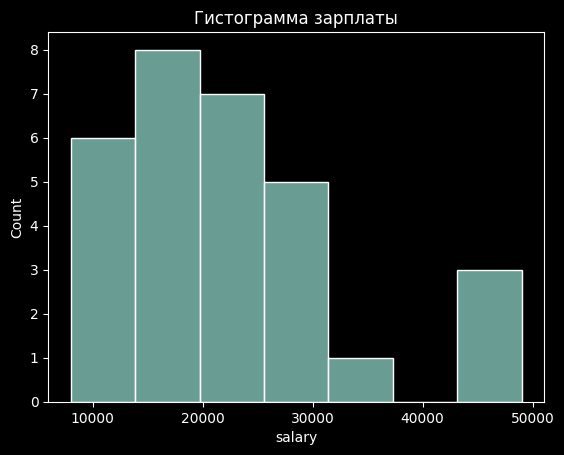

In [ ]:
sns.histplot(data=work_df, x='salary')
plt.title('Гистограмма зарплаты')

In [ ]:
fig = go.Figure(data=[go.Histogram(x=work_df['salary'])])
fig.update_layout(title_text='Гистограмма зарплаты')
#не особо красиво

# SQL задания

In [ ]:
con = sqlite3.connect('db')
#сразу создадим con, чтобы не портить логику кода
#SQLAlchemy для Oracle и тд
def select(sql):
  return pd.read_sql(sql,con)

employee_df.to_sql('Еmployee', con, if_exists='replace', index=False, method='multi')
region_df.to_sql('Region', con, if_exists='replace', index=False, method='multi')
work_df.to_sql('Work', con, if_exists='replace', index=False, method='multi')

30

Проверяем работают ли запросы

In [ ]:
sql = '''select * from Еmployee limit 2'''
select(sql)

,id_emp,name_emp,id_region,job_id,hire_date
0,1,Jack Moody,7,7,2021-05-23 00:00:00
1,2,Joseph Oconnell,4,20,2020-02-08 00:00:00


In [ ]:
sql = '''select * from Region limit 2'''
select(sql)

,id_region,name_region
0,1,Gibbsside
1,2,West Gregory


In [ ]:
sql = '''select * from Work limit 2'''
select(sql)

,job_id,job_name,salary
0,1,"Librarian, academic",28000
1,2,Health and safety adviser,21000


1.	Выгрузить список сотрудников (name_emp), вышедших на работу в 1-ю неделю каждого месяца

In [ ]:
sql = '''

select e.name_emp
from Еmployee e
where strftime('%W', hire_date) = '00'

'''
#в Oracle можно использовать extract вместо strftime

In [ ]:
select(sql)
# Вы пишите в задании: hire_date – дата принятия (выходА) на работу сотрудника (в формате ДД.ММ.ГГГГ)
# А в задании подразумевается дата выходО. Неедачное задание имхо

,name_emp


2.	Вывести кол-во сотрудников, которые проживают в одном и том же регионе и получают одну и ту же заработную плату

In [ ]:
sql = '''

select e.id_region, w.salary, count(*) AS emp_count
from Еmployee e
    left join Region r on e.id_region = r.id_region
    left join Work w on e.job_id = w.job_id
group by e.id_region, w.salary
having count(*) > 1
order by e.id_region asc, w.salary
'''

In [ ]:
select(sql)

,id_region,salary,emp_count
0,1,13000,2
1,1,28000,3
2,2,21000,4
3,2,26000,4
4,3,14000,3
5,3,30000,4
6,4,11000,3
7,4,47000,5
8,5,46000,7
9,6,20000,6


In [ ]:
sql_check = '''

  select e.name_emp
  from Еmployee e
      left join Region r on e.id_region = r.id_region
      left join Work w on e.job_id = w.job_id
  where e.id_region = 2 and w.salary = 21000
'''

In [ ]:
select(sql_check)

,name_emp
0,Mark Douglas
1,Thomas Nguyen
2,Megan Thompson
3,Jack Diaz


In [ ]:
sql_check = '''

  select * from Еmployee where name_emp in ('Nathan Strickland')
'''

In [ ]:
select(sql_check)

,id_emp,name_emp,id_region,job_id,hire_date


3.	Вывести кол-во сотрудников для каждого года выхода на работу

In [ ]:
sql = '''

select strftime('%Y', e.hire_date) hire_year, count(*) as emp_count
from Еmployee e
group by strftime('%Y', e.hire_date)
'''
#в Oracle можно использовать extract вместо strftime

In [ ]:
select(sql)

,hire_year,emp_count
0,2019,22
1,2020,28
2,2021,31
3,2022,27
4,2023,33
5,2024,9


<Axes: xlabel='hire_year', ylabel='emp_count'>

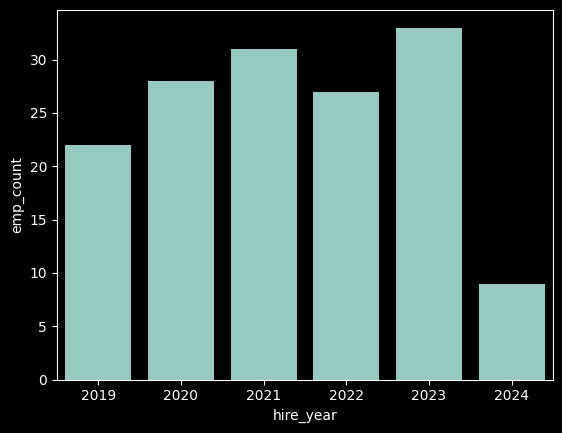

In [ ]:
t = select(sql)
sns.barplot(t, x='hire_year', y='emp_count')

<Axes: xlabel='hire_date'>

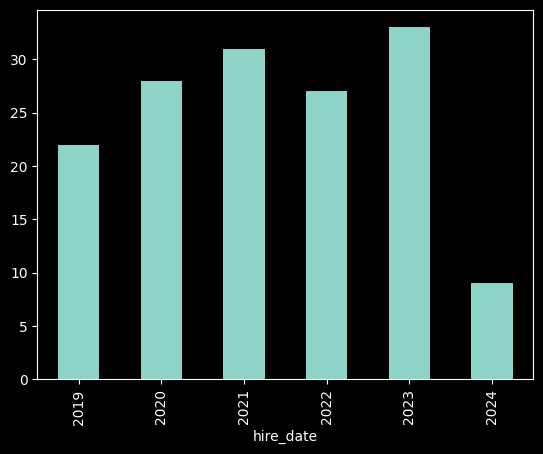

In [ ]:
employee_df['hire_date'].dt.year.value_counts().sort_index().plot(kind='bar')
#проверка

4.	Вывести регионы (name_region), где нет ни одного работающего сотрудника

In [ ]:
sql = '''

select name_region
from Region r
    left join Еmployee e on r.id_region = e.id_region
where e.id_region is null
'''

In [ ]:
select(sql)

,name_region
0,Шир


In [ ]:
sql_check = '''

select name_region, count(*)-1
from Region r
    left join Еmployee e on r.id_region = e.id_region
group by name_region
order by count(*)
'''
#count(*)-1 справедливо, см ниже

In [ ]:
select(sql_check)

,name_region,count(*)-1
0,Шир,0
1,Port Tara,5
2,Davidview,6
3,Gibbsside,6
4,Bellshire,8
5,East Tylerberg,8
6,Huynhburgh,8
7,Joshuabury,8
8,Brownberg,9
9,Mariahfort,9


In [ ]:
sql_check = '''

select * from Еmployee where id_region = 16
'''

In [ ]:
select(sql_check)

,id_emp,name_emp,id_region,job_id,hire_date


5.	Вывести все регионы (name_region), у которых кол-во работающих сотрудников более 5 и сумма всех заработных плат более 10 тыс. рублей

In [ ]:
sql = '''

select r.name_region
from Region r
    left join Еmployee e on r.id_region = e.id_region
    left join Work w on e.job_id = w.job_id
group by r.name_region
having count(*) > 5 and sum(w.salary) > 10000
'''

In [ ]:
select(sql)
#справедливо сказать, что проверка не нужна,
#так как задание 3 + специфика создания датасетов подразумевают, что все значения соответсвуют условиям
#сверху великолепная формулирвока мысли

,name_region
0,Bellshire
1,Brownberg
2,Davidview
3,East Tylerberg
4,Gibbsside
5,Huynhburgh
6,Joshuabury
7,Mariahfort
8,Port Chloe
9,Port Tara


6.	Вывести список сотрудников и отношение их заработной платы к средней заработной плате их региона проживания в том же году, в котором они вышли на работу.

In [ ]:
sql = '''

select r.name_region
from Region r
    left join Еmployee e on r.id_region = e.id_region
    left join Work w on e.job_id = w.job_id
group by r.name_region
having count(*) > 5 and sum(w.salary) > 10000
'''

In [ ]:
select(sql)

,name_region
0,Bellshire
1,Brownberg
2,Davidview
3,East Tylerberg
4,Gibbsside
5,Huynhburgh
6,Joshuabury
7,Mariahfort
8,Port Chloe
9,Port Tara


6.	Вывести список сотрудников и отношение их заработной платы к средней заработной плате их региона проживания в том же году, в котором они вышли на работу.

In [ ]:
select ('''select * from Еmployee limit 2''')

,id_emp,name_emp,id_region,job_id,hire_date
0,1,Jack Moody,7,7,2021-05-23 00:00:00
1,2,Joseph Oconnell,4,20,2020-02-08 00:00:00


In [ ]:
employee_df.shape

(150, 5)

In [ ]:
sql = '''

with temp_1 as (
    select e.name_emp, e.id_region, e.hire_date, w.salary,
        avg(w.salary) over (partition by e.id_region, strftime('%Y', e.hire_date)) as avg_region_salary
    from Еmployee e
        left join Work w on e.job_id = w.job_id
)
select t.name_emp, t.id_region, t.hire_date, t.salary,
    round(t.salary * 100 / avg_region_salary, 2) salary_to_avg_ratio
from temp_1 t
    left join Region r on t.id_region = r.id_region
'''

In [ ]:
select(sql)
#не знаю, как адектватную проверку оформить

,name_emp,id_region,hire_date,salary,salary_to_avg_ratio
0,Sarah Johnson,1,2019-12-16 00:00:00,28000,140.00
1,David Bennett,1,2019-04-30 00:00:00,12000,60.00
2,Joshua Smith,1,2020-04-03 00:00:00,28000,100.00
3,Jeffery Lloyd,1,2022-07-07 00:00:00,13000,57.78
4,Aaron Brooks,1,2022-09-19 00:00:00,32000,142.22
...,...,...,...,...,...
145,Corey Caldwell,15,2022-01-13 00:00:00,29000,100.00
146,Rodney Davis,15,2023-02-10 00:00:00,26000,123.81
147,Samuel Willis,15,2023-09-17 00:00:00,32000,152.38
148,Laurie Nash,15,2023-10-30 00:00:00,9000,42.86


7.	Вывести список сотрудников и их порядковый номер, проранжировав сотрудников по заработной плате (от высокой к низкой), в их регионе проживания.

In [ ]:
sql = '''

with temp_1 as (
    select e.name_emp, w.salary, e.id_region,
        row_number() over (partition by e.id_region order by w.salary desc) as salary_rn
    from Еmployee e
        left join Work w ON e.job_id = w.job_id
        left join Region r ON e.id_region = r.id_region
)
select name_emp, salary_rn
from temp_1
order by salary_rn
'''
#select name_emp, salary_dr - я так понял, другое не нужно выводить по условию

In [ ]:
select(sql)

,name_emp,salary_rn
0,Aaron Brooks,1
1,Glenn Higgins,1
2,William Coleman,1
3,Ann Cook,1
4,Carolyn Turner,1
...,...,...
145,Eric Mitchell,14
146,James Lee,14
147,Richard Hines,15
148,Nichole Guerrero,16


In [ ]:
t = select(sql)
t['salary_rn'].value_counts()
#1 должно быть 15, но их 47 (с dense_rank), так как у сущностей одинаковая з/п. С row_number 15

salary_rn
1     15
2     15
3     15
4     15
5     15
6     15
7     14
9     12
8     12
10     8
11     4
12     3
13     2
14     2
15     1
16     1
17     1
Name: count, dtype: int64

In [ ]:
select ('''

select e.name_emp, w.salary
from Еmployee e
    left join Work w ON e.job_id = w.job_id
where name_emp = 'Brenda Guerrero'
''')
# часть проверки

,name_emp,salary


In [ ]:
select ('''

select e.name_emp, w.salary
from Еmployee e
    left join Work w ON e.job_id = w.job_id
where w.salary in (
                  select max(salary) from Work
                  )
''')
# часть проверки

,name_emp,salary
0,Jack Moody,49000
1,Isaac Campbell,49000
2,Stephanie Padilla,49000
3,Joshua Snyder,49000
4,Brett Gray,49000
5,Duane Walters,49000
6,Wendy Miller,49000


In [ ]:
select('''
select e.name_emp, max(w.salary) as max_salary_by_region
from Еmployee e
    left join Work w ON e.job_id = w.job_id
group by id_region
order by 2
''')
# часть проверки

,name_emp,max_salary_by_region
0,Mark Burke,19000
1,Nicholas Pennington,20000
2,Jeffrey Walker,20000
3,Dean White,25000
4,Christopher Molina,27000
5,Glenn Higgins,29000
6,William Coleman,30000
7,Aaron Brooks,32000
8,Samuel Willis,32000
9,Carolyn Turner,46000


In [ ]:
select( '''

with temp_1 as (
    select e.name_emp, w.salary, e.id_region,
        dense_rank() over (partition by e.id_region order by w.salary desc) as salary_dr
    from Еmployee e
        left join Work w ON e.job_id = w.job_id
        left join Region r ON e.id_region = r.id_region
)
select name_emp, salary_dr
from temp_1
where salary_dr = 1
order by salary_dr
''')
#запрос с dense_rank (так объективней имхо)

,name_emp,salary_dr
0,Aaron Brooks,1
1,Glenn Higgins,1
2,William Coleman,1
3,Nicholas Castillo,1
4,Lisa Salazar,1
5,Brandi Ryan,1
6,Ann Cook,1
7,Benjamin Salazar,1
8,Lindsey Moody,1
9,Kirsten Lopez,1


8.	Вывести список сотрудников и количество людей, которые вышли на эту же работу за 6 месяцев до его выхода.

In [ ]:
sql = '''
select e1.name_emp,
    count(*) over (partition by e1.job_id order by e1.hire_date)-1 prev_employees
from Еmployee e1
    left join Еmployee e2 ON e1.job_id = e2.job_id
where e2.hire_date between date('now', '-6 months') and date('now')
group by e1.name_emp
'''
#в oracle можно использовать add_months вместо date(e1.hire_date, '-6 month')
#до чьего выхода? Там Волан-де-Морт работет? Поэтому ЕГО

In [ ]:
select(sql)

,name_emp,prev_employees
0,Sarah Johnson,0
1,Joshua Smith,1
2,William Snyder,2
3,Kathleen Martin,3
4,Megan Turner,0
...,...,...
75,Kayla Hayes,2
76,Karen Anderson,3
77,Mark Burke,4
78,Linda Turner,5


In [ ]:
sql_check = '''
select e1.name_emp, e1.job_id,
    count(*) over (partition by e1.job_id order by e1.hire_date)-1 prev_employees
from Еmployee e1
    left join Еmployee e2 ON e1.job_id = e2.job_id
where e2.hire_date between date('now', '-6 months') and date('now')
group by e1.name_emp
order by e1.job_id, prev_employees, e1.name_emp
'''

In [ ]:
select(sql_check)

,name_emp,job_id,prev_employees
0,Sarah Johnson,1,0
1,Joshua Smith,1,1
2,William Snyder,1,2
3,Kathleen Martin,1,3
4,Megan Turner,3,0
...,...,...,...
75,Kayla Hayes,30,2
76,Karen Anderson,30,3
77,Mark Burke,30,4
78,Linda Turner,30,5


In [ ]:
t = select(sql_check)
t.job_id.value_counts(ascending=False)
#по идее по этому можно проводить проворку

job_id
8     8
15    8
21    8
30    7
4     6
24    6
29    6
3     5
1     4
9     4
11    4
14    4
19    4
17    3
27    3
Name: count, dtype: int64

In [ ]:
t.job_id.nunique()

15

In [ ]:
#проверка на дату
t = select(sql)
t = employee_df[employee_df['name_emp'].isin(t['name_emp'])]
t.shape
#так как умные запросы меня преследуют, но я быстрее, то проверю hire_date

(81, 5)

In [ ]:
from datetime import datetime, timedelta
t = t.loc[(t['hire_date'] > (datetime.now() - timedelta(days=182))) & (t['hire_date'] <= datetime.now())]
t.shape
#вот люди, которые вышли на родту в последние 6 месяцев
#жаль, что их не 84
#значит, в запросе ошибка

(17, 5)

In [ ]:
t

,id_emp,name_emp,id_region,job_id,hire_date
12,13,Lisa Adams,11,11,2024-02-07
16,17,Ann Cook,4,4,2024-03-16
19,20,William Coleman,3,3,2023-10-14
34,35,Kristie Patterson,13,29,2023-11-04
38,39,Kim Best,11,27,2024-02-23
49,50,Douglas Hodges,3,19,2024-02-02
70,71,Carol Brown,5,21,2024-02-09
79,80,Lori Cannon,8,8,2024-01-21
82,83,Elizabeth Herrera,14,14,2024-01-31
83,84,Kimberly Moore,1,17,2023-12-21


In [ ]:
sql_check_2 = '''
select e1.name_emp, e1.job_id, e1.hire_date,
    count(*) over (partition by e1.job_id order by e1.hire_date)-1 prev_employees
from Еmployee e2
    left join Еmployee e1 ON e1.job_id = e2.job_id and e2.hire_date between date('now', '-6 months') and date('now')
where e1.hire_date between date('now', '-6 months') and date('now')
group by e1.name_emp
order by e1.job_id, prev_employees, e1.name_emp
'''
#проблема была в дате (поэтому выводилось 84)
#длина столбца совпала с длиной t. Супер

In [ ]:
select(sql_check_2)

,name_emp,job_id,hire_date,prev_employees
0,Kathleen Martin,1,2023-12-16 00:00:00,0
1,William Coleman,3,2023-10-14 00:00:00,0
2,Kirsten Lopez,4,2024-02-15 00:00:00,0
3,Ann Cook,4,2024-03-16 00:00:00,1
4,Lori Cannon,8,2024-01-21 00:00:00,0
5,Randall Eaton,8,2024-03-16 00:00:00,1
6,Steven King,9,2023-10-11 00:00:00,0
7,Lisa Adams,11,2024-02-07 00:00:00,0
8,Elizabeth Herrera,14,2024-01-31 00:00:00,0
9,Laurie Nash,15,2023-10-30 00:00:00,0


In [ ]:
sql = '''

select e1.name_emp, e1.job_id, e1.hire_date,
    count(*) over (partition by e1.job_id order by e1.hire_date)-1 prev_employees
from Еmployee e2
    left join Еmployee e1 ON e1.job_id = e2.job_id and e2.hire_date between date('now', '-6 months') and date('now')
where e1.hire_date between date('now', '-6 months') and date('now') and e1.job_id=4
group by e1.name_emp
order by e1.job_id, prev_employees, e1.name_emp
'''
#допустим есть человек, который вышел на работу (job_id=4) 7 апреля 2024, для него и найдем

In [ ]:
select(sql)
#Вывести список сотрудников, которые вышли на эту же работу за 6 месяцев до его выхода.

,name_emp,job_id,hire_date,prev_employees
0,Kirsten Lopez,4,2024-02-15 00:00:00,0
1,Ann Cook,4,2024-03-16 00:00:00,1


In [ ]:
t = select(sql)
t.shape[0]
#Вывести количество люде, которые вышли на эту же работу за 6 месяцев до его выхода.
#или через cte, но мне так удобнее

2

In [ ]:
sql = '''

select e1.name_emp, e1.job_id, e1.hire_date,
    count(*) over (partition by e1.job_id order by e1.hire_date)-1 prev_employees
from Еmployee e1
where e1.hire_date between date('now', '-6 months') and date('now')
group by e1.name_emp

'''
#упрощенная версия запроса
#ответ на 8 задачу

In [ ]:
select(sql)

,name_emp,job_id,hire_date,prev_employees
0,Kathleen Martin,1,2023-12-16 00:00:00,0
1,William Coleman,3,2023-10-14 00:00:00,0
2,Kirsten Lopez,4,2024-02-15 00:00:00,0
3,Ann Cook,4,2024-03-16 00:00:00,1
4,Lori Cannon,8,2024-01-21 00:00:00,0
5,Randall Eaton,8,2024-03-16 00:00:00,1
6,Steven King,9,2023-10-11 00:00:00,0
7,Lisa Adams,11,2024-02-07 00:00:00,0
8,Elizabeth Herrera,14,2024-01-31 00:00:00,0
9,Laurie Nash,15,2023-10-30 00:00:00,0


# Комментарий

Чет я устал. 1 задание мимо (не понимаю, что требуется). В 8 сильно перекручено решение (оно уже на морально-волевых делалось), поэтому ок. Без self join решение на утро след дня сразу в голову пришло